In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [11]:
data = np.load("output_files_MG/output_1_1jet_127.npz")

In [12]:
data.keys()

['vph', 'theta', 'vth', 't', 'p', 'phi', 'om']

In [13]:
data["vth"].shape # number of phis, number of thetas



(256, 128)

In [14]:
data["theta"].size

128

<IPython.core.display.Javascript object>


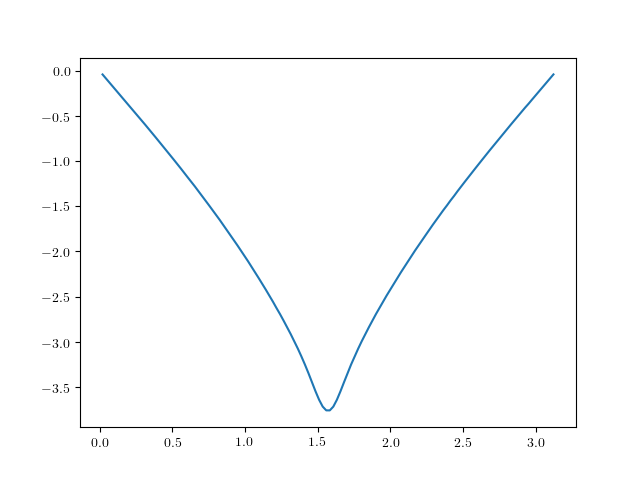

In [15]:
fig1 = plt.figure()
plt.plot(data["theta"],data["vph"][0,:]) # 0 tp pi in x b/c colatitude

<IPython.core.display.Javascript object>


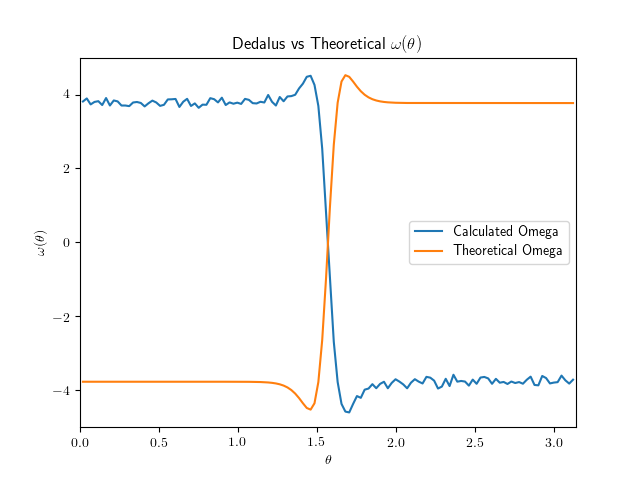

In [16]:
Gamma = 6*np.pi/5 # make Gamma negative to see how the graphs compare in value --- very close!
delta_th = 0.1
theta_theo = data["theta"]
lat = theta_theo - np.pi/2

def cot(x):
    return 1/np.tan(x)

om_theo = -Gamma * ( ( (np.tanh(lat/delta_th)/2) + (lat*(1-np.tanh(lat/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat*np.tanh(lat/delta_th)/2) + np.pi/4)**2) + (cot( (lat*np.tanh(lat/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )

fig2 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(data["theta"],data["om"][0,:],label = 'Calculated Omega')
plt.plot(data["theta"],om_theo,label = 'Theoretical Omega')
plt.xlim(0, np.pi)
plt.xlabel(r'\theta')
plt.ylim(-5,5)
plt.ylabel(r'\omega(\theta)')
plt.title('Dedalus vs Theoretical 'r'$\omega(\theta)$')
plt.legend(loc='right')
# Questions 11/1/17
# how do I interpret these results physically?

<IPython.core.display.Javascript object>


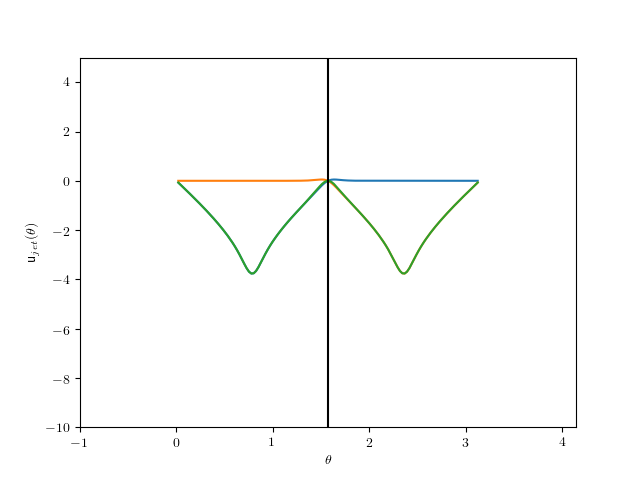

<function matplotlib.pyplot.show>

In [99]:
lat2 = theta_theo - 3*np.pi/4
lat = theta_theo - np.pi/4
# Mess with plot to create two jets
fig3 = plt.figure()
plt.rc('text', usetex=True)
# Original u_jet
# u_jet = Gamma*np.tan( lat*np.tanh( lat/delta_th )/2 - np.pi/4)

# argument to tanh goes through zero when plot makes its jump/"turns on"
tanh_prof = -(0.5*np.tanh((theta_theo-np.pi/2)/delta_th)-0.5)
u_jet =  (Gamma*np.tan( lat*np.tanh(lat/delta_th) - np.pi/4 ))*tanh_prof
u_jet2 =  (Gamma*np.tan( lat2*np.tanh(lat2/delta_th) - np.pi/4 ))*(1-tanh_prof)
u_jet3 = u_jet + u_jet2


plt.plot(theta_theo,u_jet,label='u_jet')
plt.plot(theta_theo,u_jet2,label='u_jet2')
plt.plot(theta_theo,u_jet3,label='u_jet3')
plt.axvline(np.pi/2,color ='black')
#plt.plot(theta_theo,tanh_prof)
plt.xlim(-1,np.pi+1)
plt.xlabel(r'\theta')
plt.ylim(-10,5)
plt.ylabel(r'\ u_{jet}(\theta)')
plt.show

In [18]:
data2 = np.load("output_files_MG/output_1_2jet_127.npz")
data2.keys()

['vph', 'phi', 'theta', 'vth', 't', 'p', 'om']

In [87]:
#fig4 = plt.figure()
#plt.plot(data2["theta"],data2["vph"][0,:])

<IPython.core.display.Javascript object>


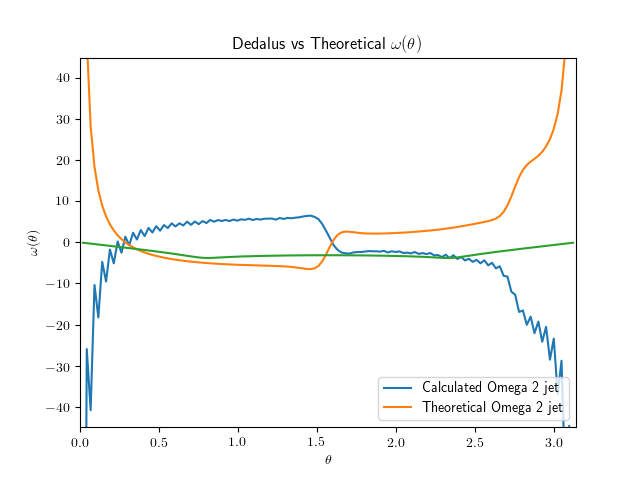

In [20]:
Gamma = 6*np.pi/5 # make Gamma negative to see how the graphs compare in value --- very close!
delta_th = 0.1



om_theo2_a = Gamma * ( ( (np.tanh(lat/delta_th)/2) + (lat*(1-np.tanh(lat/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat*np.tanh(lat/delta_th)/2) + np.pi/4)**2) + (cot( (lat*np.tanh(lat/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo2_b = Gamma * ( ( (np.tanh(lat2/delta_th)/2) + (lat2*(1-np.tanh(lat2/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat2*np.tanh(lat2/delta_th)/2) + np.pi/4)**2) + (cot( (lat2*np.tanh(lat2/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo2 = -(om_theo2_a + om_theo2_b)



fig2 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(theta_theo,data2["om"][0,:],label = 'Calculated Omega 2 jet') # note the negative in front of data2["om"]
plt.plot(theta_theo,om_theo2,label = 'Theoretical Omega 2 jet')
plt.xlim(0, np.pi)
plt.xlabel(r'\theta')
plt.ylim(-45,45)
plt.ylabel(r'\omega(\theta)')
plt.title('Dedalus vs Theoretical ' r'$\omega(\theta)$')
plt.legend(loc='lower right')

In [21]:
data3 = np.load("output_files_MG/output_1_2jet_symmeq.npz")

In [22]:
### TWO JETS CENTERED ABOUT THE EQUATOR ###

<IPython.core.display.Javascript object>


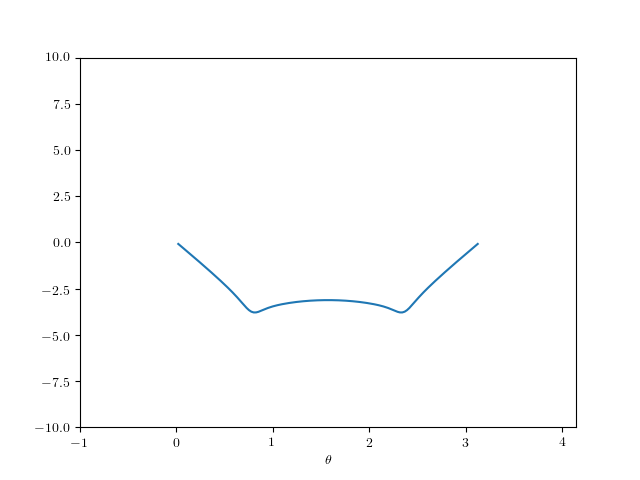

<function matplotlib.pyplot.show>

In [29]:
plt.plot(data3["theta"],data3["vph"][0,:])

lat_pos = (theta_theo - 3*np.pi/4)
lat_neg = (theta_theo - np.pi/4)

u_jet_pos =  Gamma*np.tan( lat_pos*np.tanh(lat_pos/delta_th)/2 - np.pi/4 )
u_jet_neg =  Gamma*np.tan( lat_neg*np.tanh(lat_neg/delta_th)/2 - np.pi/4 )
u_jet4 = u_jet_pos + u_jet_neg

# Mess with plot to create two jets
fig5 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(theta_theo,u_jet4,label='u_jet') # theoretical jet profile
#plt.plot(data3["theta"],data3["vph"][0,:]) # actual jet profile
plt.xlim(-1,np.pi+1)
plt.xlabel(r'\theta')
plt.ylim(-10,10)
#plt.ylabel(r'\ u_{jet}(theta)')
plt.show

<IPython.core.display.Javascript object>


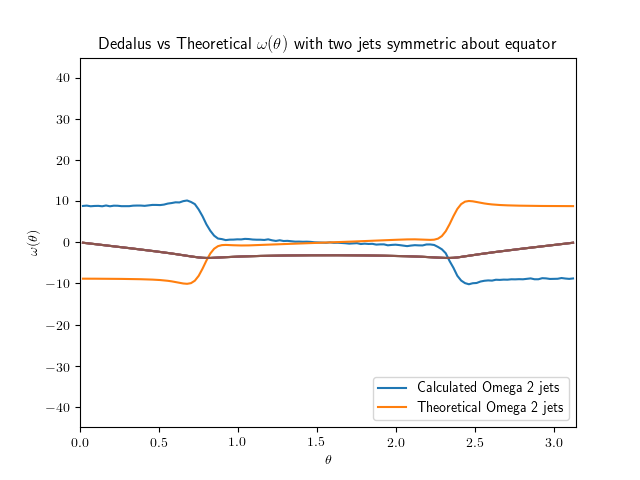

In [24]:

om_theo_pos = Gamma * ( ( (np.tanh(lat_pos/delta_th)/2) + (lat_pos*(1-np.tanh(lat_pos/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat_pos*np.tanh(lat_pos/delta_th)/2) + np.pi/4)**2) + (cot( (lat_pos*np.tanh(lat_pos/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo_neg = Gamma * ( ( (np.tanh(lat_neg/delta_th)/2) + (lat_neg*(1-np.tanh(lat_neg/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat_neg*np.tanh(lat_neg/delta_th)/2) + np.pi/4)**2) + (cot( (lat_neg*np.tanh(lat_neg/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo_eq = -(om_theo_pos + om_theo_neg)



fig6 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(theta_theo,data3["om"][0,:],label = 'Calculated Omega 2 jets')
plt.plot(theta_theo,om_theo_eq,label = 'Theoretical Omega 2 jets')
plt.xlim(0, np.pi)
plt.xlabel(r'\theta')
plt.ylim(-45,45)
plt.ylabel(r'\omega(\theta)')
plt.title('Dedalus vs Theoretical ' r'$\omega(\theta)$' ' with two jets symmetric about equator')
plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


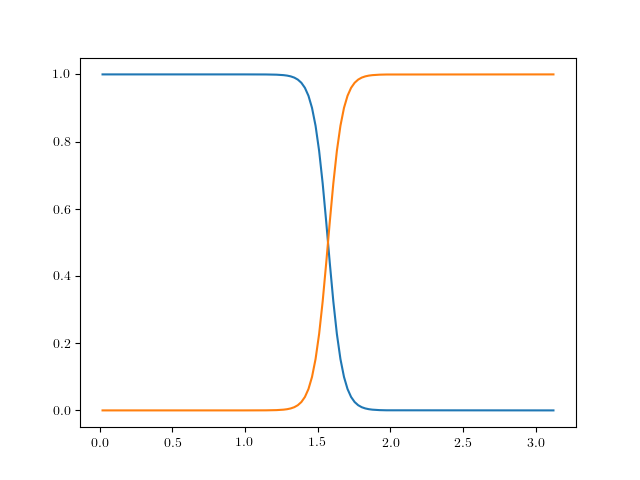

In [86]:
plt.figure()
#plt.axvline(np.pi/2)
tanh_prof = -(0.5*np.tanh((theta_theo-np.pi/2)/delta_th)-0.5)
plt.plot(theta_theo,tanh_prof)
# plt.plot(theta_theo,1-(0.5+np.tanh(-(theta_theo-np.pi/2)/0.1)/2)) # same thing?
plt.plot(theta_theo,1-tanh_prof)